# Importing dependencies

In [13]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import random
import string
from Crypto.Cipher import AES
import noisereduce as nr
from ipywebrtc import AudioRecorder, CameraStream
import torchaudio
from IPython.display import Audio

## Taking input

Text(0.5, 1.0, 'Original Audio Plot')

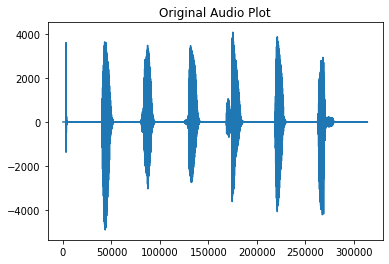

In [14]:
wav_loc = '../audio/audio.wav'
fs, data = wavfile.read(wav_loc)
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [15]:
rate, data = wavfile.read(wav_loc)

In [16]:
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("../audio/wav_reduced_noise.wav", rate, reduced_noise)

In [17]:
with open('../audio/wav_reduced_noise.wav', 'rb') as fd:
    contents = fd.read()

## Playing that sound

In [18]:
sd.play(data, fs)

## Getting ready with AES

In [19]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [20]:
# (encrypt/decrypt, the key size can be 128/192/256 bits.)
print("AES Key is ", AES_KEY) 

# used to start some iterated process
# (In particular, it ensures that encrypting the same message twice yields two completely different ciphertexts, which is necessary in order for the encryption scheme to be semantically secure.)
print("AES Initialization vector is ", AES_IV) 

AES Key is  gtL0P3UZqXKkxji8vLgOwRazXNAiHv5T
AES Initialization vector is  pGQqhy8chmrBi44s


## Encrpytion of audio file

In [21]:
print(contents[:20])

b'RIFF\xa4\x94\t\x00WAVEfmt \x10\x00\x00\x00'


In [22]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

In [23]:
print(encrypted_audio[:20])

b'\xbd\xbat\xed\x80\x15B\xf7(\x14\xad\xcc\x9dMv\x8d.\x07\x9c#'


## Saving the encrypted file

In [24]:
with open('../audio/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [25]:
print(type(encrypted_audio))

<class 'bytes'>


## Loading

In [26]:
with open('../audio/encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

## Decryption of data

In [27]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [28]:
with open('../audio/decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

In [29]:
print(decrypted_audio[:20])

b'RIFF\xa4\x94\t\x00WAVEfmt \x10\x00\x00\x00'


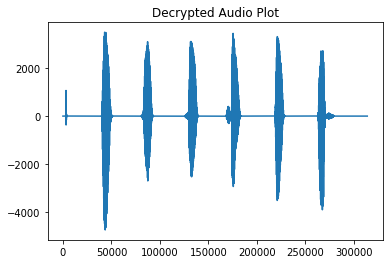

In [30]:
fs, data = wavfile.read('../audio/decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [31]:
sd.play(data, fs)

AES : Points to remember
    - AES is a block cipher(Block cipher Uses confusion(hides ct-k) as well as diffusion(hides ct-pt))
    - The key size can be 128/192/256 bits.
    - Encrypts data in blocks of 128 bits each.